In [43]:
import numpy as np
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion
import matplotlib.pyplot as plt

**1. Выберите все формулы, задающие доверительный интервал для доли.**


$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$


$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 
---
---

**2. Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.**

**Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.**

In [28]:
make_beaty = lambda res: list(map(lambda x: round(x, 4), res))

def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    import numpy as np
    import scipy.stats as sts
    q_ = count / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [60]:
proportion_confint(1, 50, method="normal")

(0.0, 0.05880530708179099)

In [30]:
res_1 = my_proportion_confint(1, 50)
make_beaty(res_1)

[-0.0188, 0.0588]

___
---

**3. В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.**

In [14]:
res_2 = proportion_confint(1, 50, method="wilson")

make_beaty(res_2)

[0.0035, 0.105]

---
---
**4. Какой из двух построенных доверительных интервалов выглядит более вменяемым, учитывая, что параметр, для которого строится оценка, меняется от 0 до 1?**


- нормальный  


- Уилсона +



---
---

**5. Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?**

In [40]:
int(np.ceil(samplesize_confint_proportion(1/50, 0.01)))

753

In [52]:
x = np.linspace(0, 1, 201)
y = np.array([int(np.ceil(samplesize_confint_proportion(p, 0.01))) for p in x])

9604


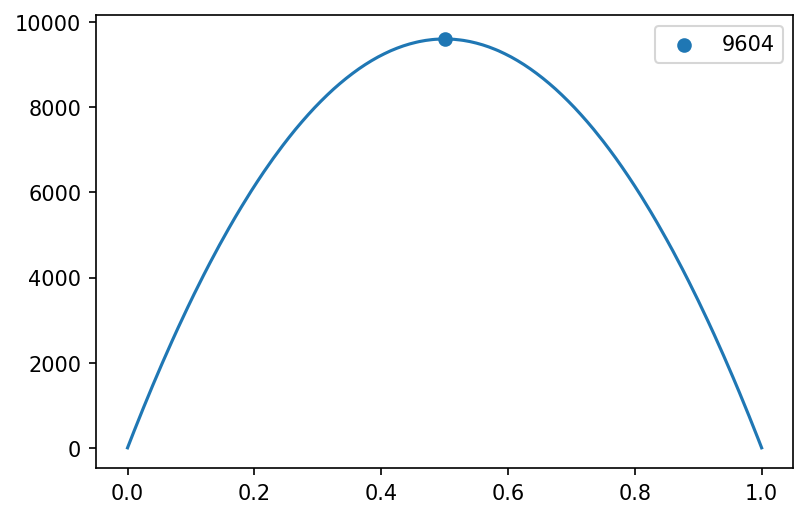

In [59]:
plt.figure(dpi=150)
i = np.where(y == max(y))[0][0]
plt.plot(x, y)
plt.scatter(x[i], y[i], label=f"{y[i]}")
plt.legend();
print(y[i])